# Use case - Customer Churn Prediction and Analysis

In [1]:
#Loding and importing all the required packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.neighbors
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
from scipy import stats
from sklearn import preprocessing as prep
from sklearn.preprocessing import Imputer
import pylab as pl
plt.style.use('ggplot')
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
from scipy.spatial.distance import cdist
from sklearn import cluster
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.externals import joblib
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import datetime
from mlxtend.plotting import plot_confusion_matrix

C:\Users\deepanshu.chopra\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.

Using TensorFlow backend.


### Loading dataset

In [2]:
file = 'BankCustomerChurnDataFeb19_Heavy.xlsx'

In [3]:
df = pd.read_excel(file, sheetname="BankCustomerData") 
print (df.shape)

(75000, 105)


## Data Pre-Processing

In [4]:
df.head()

,@ID,ACCOUNT.NUMBER,CUSTOMER.CODE,CUSTOMER.NO,GENDER,AGE,DAYS.AS.CUSTOMER,SECTOR,COUNTRY,CURRENCY,...,Min Bank transfer amount,Max Bank transfer amount,Min No. of Check payments,Max No. of Check payments,Min Check payment amount,Max Check payment amount,Min End balance,Max End Balance,ReasonWhyCustomerLeft,Exited
0,1,10000,15000000,100000,Male,49,784,Financial Advisors & Brokers,France,EUR,...,7860,98270,8,13,3812,87054,1563,64159,Not Exited,0
1,2,10001,15000001,100001,Male,55,288,Individual,United States of America,USD,...,8882,10115,7,12,4039,89501,5943,11346,Not Exited,0
2,3,10002,15000002,100002,Male,67,1223,Retail Small/Med Enterprise,Canada,CAD,...,4255,21758,8,10,5401,80590,8689,2520,Bad Service,1
3,4,10003,15000003,100003,Male,92,919,Insurance Companies,Canada,CAD,...,2290,87106,8,12,7507,96765,3082,94398,Not Exited,0
4,5,10004,15000004,100004,Male,57,1355,Broker,Canada,CAD,...,1261,39995,6,12,861,75362,3939,88392,Not Exited,0


## Loading Sentimental Analysis Score of the Customer

In [5]:
#file = 'BOACustomerSentimentScore.csv'
file = 'CustomerSentimentScoreData.xlsx'

In [6]:
#tweets_df = pd.read_csv(file) 
tweets_df = pd.read_excel(file, sheetname="SentimentScore") 
tweets_df.rename(columns={'CUSTOMER.CODE': 'CUSTOMER.CODE', 'SCORE': 'Sentimental.Score'}, inplace=True)
#tweets_df
#.drop(["Unnamed: 0"], axis = 1, inplace=True)

In [7]:
tweets_df['Sentimental.Score'] = (tweets_df['Sentimental.Score']).astype(int) 
#tweets_df

## Merge the Original Dataframe with the Sentimental Score of Customer

In [8]:
#df['Sentimental.Score'] = df['Sentimental.Score'].round()
tweets_df['Sentimental.Score'].fillna(0, inplace=True)
#tweets_df

In [9]:
df = pd.merge(df, tweets_df, on='CUSTOMER.CODE', how='outer')
df.shape

(75000, 106)

In [10]:
df['Sentimental.Score'].fillna(0, inplace=True)
df

,@ID,ACCOUNT.NUMBER,CUSTOMER.CODE,CUSTOMER.NO,GENDER,AGE,DAYS.AS.CUSTOMER,SECTOR,COUNTRY,CURRENCY,...,Max Bank transfer amount,Min No. of Check payments,Max No. of Check payments,Min Check payment amount,Max Check payment amount,Min End balance,Max End Balance,ReasonWhyCustomerLeft,Exited,Sentimental.Score
0,1,10000,15000000,100000,Male,49,784,Financial Advisors & Brokers,France,EUR,...,98270,8,13,3812,87054,1563,64159,Not Exited,0,5
1,2,10001,15000001,100001,Male,55,288,Individual,United States of America,USD,...,10115,7,12,4039,89501,5943,11346,Not Exited,0,4
2,3,10002,15000002,100002,Male,67,1223,Retail Small/Med Enterprise,Canada,CAD,...,21758,8,10,5401,80590,8689,2520,Bad Service,1,3
3,4,10003,15000003,100003,Male,92,919,Insurance Companies,Canada,CAD,...,87106,8,12,7507,96765,3082,94398,Not Exited,0,-7
4,5,10004,15000004,100004,Male,57,1355,Broker,Canada,CAD,...,39995,6,12,861,75362,3939,88392,Not Exited,0,-6
5,6,10005,15000005,100005,Male,65,919,Broker,United States of America,USD,...,64320,5,11,1188,66667,1900,86720,Not Exited,0,8
6,7,10006,15000006,100006,Female,37,975,Central Banks,France,EUR,...,52934,6,15,2626,75167,1723,36516,Bad Service,1,2
7,8,10007,15000007,100007,Female,19,740,Retail Small/Med Enterprise,Canada,CAD,...,46515,4,14,5777,66971,1444,85818,Not Exited,0,10
8,9,10008,15000008,100008,Male,60,1378,Investment exchange - Margin,United States of America,USD,...,24562,5,10,4716,70931,3488,17309,Bad Service,1,-3
9,10,10009,15000009,100009,Female,40,528,***Corporate,France,EUR,...,63401,2,11,7585,44158,4450,38067,Not Exited,0,4


# Exploratory Data Analysis

In [11]:
y_True = df["Exited"][df["Exited"] == 1]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["Exited"].shape[0]) * 100 ), '%') 

Churn Percentage = 29.801333333333336 %


In [12]:
#sentimental_df = tweets_df

In [13]:
def func(x):
    if x < -5:
        return "Worst"
    elif x < 0 and x > -5: 
        return "Bad"
    elif x == 0:
        return "Neutral"
    elif x > 0 and x < 3:
        return "Good"
    elif x > 3 and x < 5:
        return "Very Good"
    else:
        return 'Excellent'

df['Sentimental.Category'] = df['Sentimental.Score'].apply(func) 
df

,@ID,ACCOUNT.NUMBER,CUSTOMER.CODE,CUSTOMER.NO,GENDER,AGE,DAYS.AS.CUSTOMER,SECTOR,COUNTRY,CURRENCY,...,Min No. of Check payments,Max No. of Check payments,Min Check payment amount,Max Check payment amount,Min End balance,Max End Balance,ReasonWhyCustomerLeft,Exited,Sentimental.Score,Sentimental.Category
0,1,10000,15000000,100000,Male,49,784,Financial Advisors & Brokers,France,EUR,...,8,13,3812,87054,1563,64159,Not Exited,0,5,Excellent
1,2,10001,15000001,100001,Male,55,288,Individual,United States of America,USD,...,7,12,4039,89501,5943,11346,Not Exited,0,4,Very Good
2,3,10002,15000002,100002,Male,67,1223,Retail Small/Med Enterprise,Canada,CAD,...,8,10,5401,80590,8689,2520,Bad Service,1,3,Excellent
3,4,10003,15000003,100003,Male,92,919,Insurance Companies,Canada,CAD,...,8,12,7507,96765,3082,94398,Not Exited,0,-7,Worst
4,5,10004,15000004,100004,Male,57,1355,Broker,Canada,CAD,...,6,12,861,75362,3939,88392,Not Exited,0,-6,Worst
5,6,10005,15000005,100005,Male,65,919,Broker,United States of America,USD,...,5,11,1188,66667,1900,86720,Not Exited,0,8,Excellent
6,7,10006,15000006,100006,Female,37,975,Central Banks,France,EUR,...,6,15,2626,75167,1723,36516,Bad Service,1,2,Good
7,8,10007,15000007,100007,Female,19,740,Retail Small/Med Enterprise,Canada,CAD,...,4,14,5777,66971,1444,85818,Not Exited,0,10,Excellent
8,9,10008,15000008,100008,Male,60,1378,Investment exchange - Margin,United States of America,USD,...,5,10,4716,70931,3488,17309,Bad Service,1,-3,Bad
9,10,10009,15000009,100009,Female,40,528,***Corporate,France,EUR,...,2,11,7585,44158,4450,38067,Not Exited,0,4,Very Good


In [14]:
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]


In [15]:
df = change_column_order(df, 'Exited', len(df.columns)-1)
df

,@ID,ACCOUNT.NUMBER,CUSTOMER.CODE,CUSTOMER.NO,GENDER,AGE,DAYS.AS.CUSTOMER,SECTOR,COUNTRY,CURRENCY,...,Min No. of Check payments,Max No. of Check payments,Min Check payment amount,Max Check payment amount,Min End balance,Max End Balance,ReasonWhyCustomerLeft,Sentimental.Score,Sentimental.Category,Exited
0,1,10000,15000000,100000,Male,49,784,Financial Advisors & Brokers,France,EUR,...,8,13,3812,87054,1563,64159,Not Exited,5,Excellent,0
1,2,10001,15000001,100001,Male,55,288,Individual,United States of America,USD,...,7,12,4039,89501,5943,11346,Not Exited,4,Very Good,0
2,3,10002,15000002,100002,Male,67,1223,Retail Small/Med Enterprise,Canada,CAD,...,8,10,5401,80590,8689,2520,Bad Service,3,Excellent,1
3,4,10003,15000003,100003,Male,92,919,Insurance Companies,Canada,CAD,...,8,12,7507,96765,3082,94398,Not Exited,-7,Worst,0
4,5,10004,15000004,100004,Male,57,1355,Broker,Canada,CAD,...,6,12,861,75362,3939,88392,Not Exited,-6,Worst,0
5,6,10005,15000005,100005,Male,65,919,Broker,United States of America,USD,...,5,11,1188,66667,1900,86720,Not Exited,8,Excellent,0
6,7,10006,15000006,100006,Female,37,975,Central Banks,France,EUR,...,6,15,2626,75167,1723,36516,Bad Service,2,Good,1
7,8,10007,15000007,100007,Female,19,740,Retail Small/Med Enterprise,Canada,CAD,...,4,14,5777,66971,1444,85818,Not Exited,10,Excellent,0
8,9,10008,15000008,100008,Male,60,1378,Investment exchange - Margin,United States of America,USD,...,5,10,4716,70931,3488,17309,Bad Service,-3,Bad,1
9,10,10009,15000009,100009,Female,40,528,***Corporate,France,EUR,...,2,11,7585,44158,4450,38067,Not Exited,4,Very Good,0


In [16]:
#_, ax = plt.subplots(1, 3, figsize=(18, 6))
#plt.subplots_adjust(wspace=0.3)
#sns.swarmplot(x = "NumOfProducts", y = "AGE", hue="Exited", data = df, ax= ax[0])
#sns.swarmplot(x = "HasCrCard", y = "AGE", data = df, hue="Exited", ax = ax[1])
#sns.swarmplot(x = "IsActiveMember", y = "AGE", hue="Exited", data = df, ax = ax[2])

In [17]:
'''_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "AGE", y = "Max End Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[0])
sns.scatterplot(x = "AGE", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[1])'''

'_, ax =  plt.subplots(1, 2, figsize=(15, 7))\ncmap = sns.cubehelix_palette(light=1, as_cmap=True)\nsns.scatterplot(x = "AGE", y = "Max End Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[0])\nsns.scatterplot(x = "AGE", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[1])'

In [18]:
#plt.figure(figsize=(8, 8))
#sns.swarmplot(x = "HasCreditCard", y = "AGE", data = df, hue="Exited")

In [19]:
'''facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Max End Balance",shade= True)
facet.set(xlim=(0, df["Max End Balance"].max()))
facet.add_legend()
plt.show()'''

'facet = sns.FacetGrid(df, hue="Exited",aspect=3)\nfacet.map(sns.kdeplot,"Max End Balance",shade= True)\nfacet.set(xlim=(0, df["Max End Balance"].max()))\nfacet.add_legend()\nplt.show()'

In [20]:
'''facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, df["CreditScore"].max()))
facet.add_legend()
plt.show()'''

'facet = sns.FacetGrid(df, hue="Exited",aspect=3)\nfacet.map(sns.kdeplot,"CreditScore",shade= True)\nfacet.set(xlim=(0, df["CreditScore"].max()))\nfacet.add_legend()\nplt.show()'

In [21]:
Boxdf=df


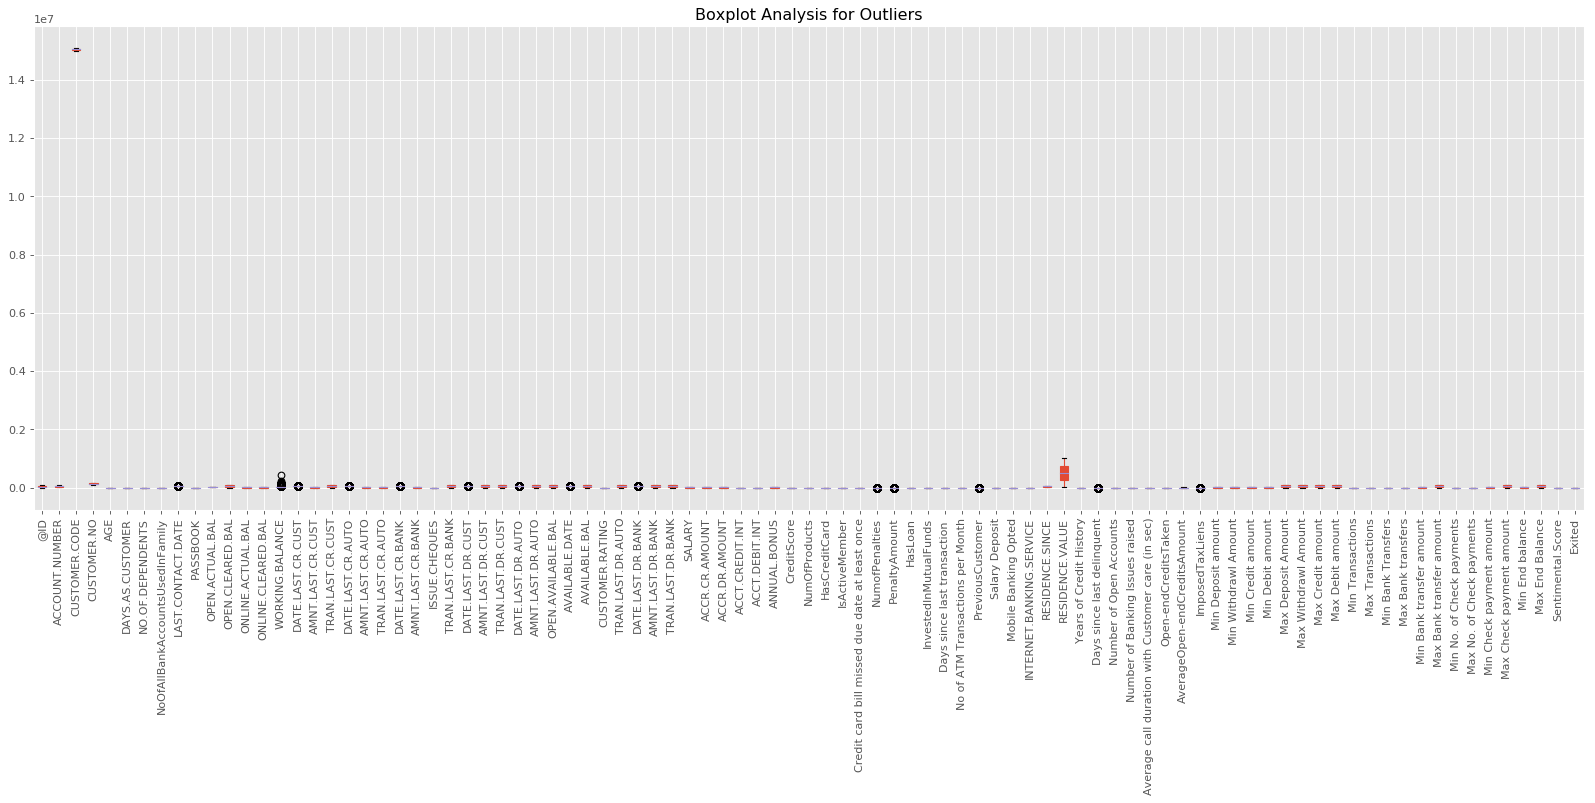

In [23]:

plt.figure(figsize=(25,8),dpi=80, facecolor='w', edgecolor='k')
bplot = Boxdf.boxplot(patch_artist=True)
plt.xticks(rotation=90)
plt.title('Boxplot Analysis for Outliers')
plt.savefig("6.png")
plt.show()
plt.clf()

In [24]:
Positive_Sentiments = df['Sentimental.Score'][df['Sentimental.Score'] > 0].count()
Negative_Sentiments = df['Sentimental.Score'][df['Sentimental.Score'] < 0].count()
Neutral_Sentiments = df['Sentimental.Score'][df['Sentimental.Score'] == 0].count()
print('Positive_Sentiments : ', Positive_Sentiments)
print('Negative_Sentiments : ', Negative_Sentiments)
print('Neutral_Sentiments : ', Neutral_Sentiments)

Positive_Sentiments :  35599
Negative_Sentiments :  35872
Neutral_Sentiments :  3529


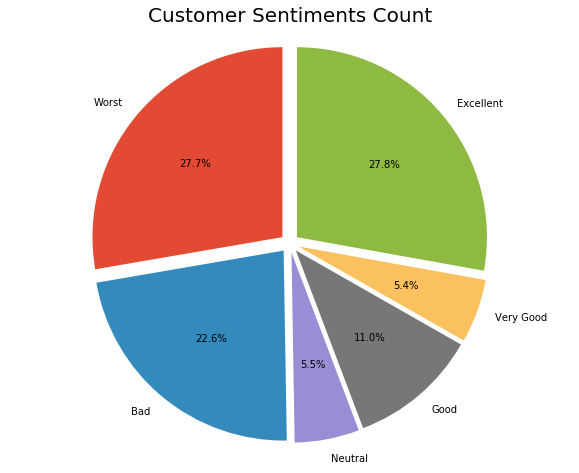

In [25]:
labels = 'Worst', 'Bad', 'Neutral', 'Good', 'Very Good', 'Excellent'
sizes = [df['Sentimental.Score'][df['Sentimental.Score'] <- 5].count(), 
         df['Sentimental.Score'][(df['Sentimental.Score'] > - 5) & (df['Sentimental.Score'] < 0)].count(),
         df['Sentimental.Score'][df['Sentimental.Score'] == 0].count(),
         df['Sentimental.Score'][(df['Sentimental.Score'] > 0) & (df['Sentimental.Score'] < 3)].count(),
         df['Sentimental.Score'][(df['Sentimental.Score'] > 3) & (df['Sentimental.Score'] < 5)].count(),
         df['Sentimental.Score'][df['Sentimental.Score'] > 5].count()]

explode = (0.05,0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')
plt.title("Customer Sentiments Count", size = 20)
plt.savefig("OverallCustomerSentiments_Pie.png")
plt.show()
plt.clf()

In [26]:
df.drop(["ReasonWhyCustomerLeft","Sentimental.Category"], axis = 1, inplace=True) 

### Handling the Categorical attributes by Encoding to Numerical values for analysis

In [27]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

In [28]:
object_cols = df.select_dtypes(include=['object']).copy()
ObjCols = []

for col in object_cols:  # Iterate over chosen columns
    df[col] = label_encoder.fit_transform(df[col])
    le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    ObjCols.append((col,le_name_mapping))

discreet_encoding_values = pd.DataFrame(ObjCols)
print(discreet_encoding_values)

                    0                                                  1
0              GENDER                           {'Male': 1, 'Female': 0}
1              SECTOR  {'Unincorporated Businesses': 21, 'Corporate I...
2             COUNTRY  {'France': 1, 'Canada': 0, 'United States of A...
3            CURRENCY                     {'EUR': 1, 'USD': 2, 'CAD': 0}
4     CALC.RISK.CLASS                 {'High': 0, 'Medium': 2, 'Low': 1}
5            INDUSTRY  {'Derivatives': 10, 'Electrical Equipment Manu...
6            Job Type  {'retired': 5, 'blue-collar': 1, 'entrepreneur...
7      Marital Status         {'Divorced': 0, 'Married': 1, 'Single': 2}
8           Education     {'Teritiary': 2, 'Primary': 0, 'Secondary': 1}
9        Phonecontact                       {'Landline': 0, 'Mobile': 1}
10  AccountAccessType                          {'Joint': 0, 'Single': 1}
11        AccountType                       {'Current': 0, 'Savings': 1}
12      HomeOwnership          {'Own': 1, 'Rent': 2

In [29]:
y = df['Exited'].as_matrix().astype(np.int)
y.size

75000

In [30]:
# Remove the Dependent Variable from the dataframe and put it into Independent Variable X
df.drop(["Exited"], axis = 1, inplace=True) 
X = df.as_matrix().astype(np.float)

### Standardaizing the data

In [31]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [32]:
### Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234, stratify = y)

In [34]:
### Get the Accuracy and Precision

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def getAccuracy(y_test, y_pred):
    return accuracy_score(y_test, y_pred)*100

def getPrecision(y_test, y_pred):
    return classification_report(y_test, y_pred)

#************************************************************************
# Part 2 - Now let's make the ANN!
#************************************************************************

In [36]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential # To initialize our Neural Network.
from keras.layers import Dense      # That requires to build our ANN.
from keras.layers import Dropout

### Initialising the ANN. (We wanted to make our Sequence of Layers Model)

In [37]:
classifier = Sequential()


In [38]:
# Adding the input layer and the first hidden layer
# Why units = 6. Explanation: It is first Hidden Layer. We have 11 Independent Variables. Formula use 11+1/2 ==> 12/2 ==>6    
# Activation = relu. Explanation: We take Activation function in hidden layer as Rectifier Function and Output as Sigmoid.
# input_dim = 11. Explanation: As we have 11 independent variables.

In [39]:
classifier.add(Dense(units = 53, kernel_initializer = 'uniform', activation = 'relu', input_dim = 104))

In [40]:
#Dropout to be used when you find, the model is too much overfitted. 0.1 means it is going to eliminate 10% of neurons from the current layer. 
# If the overfitting problem does not solve, keep increasing dropout to 0.1 till 0.5 but not go beyond 0.5 else underftting problem will occur.


In [41]:
#classifier.add(Dropout(p = 0.1))


In [42]:
# Adding the second hidden layer
#classifier.add(Dense(units = 53, kernel_initializer = 'uniform', activation = 'relu'))
# Everything remains the same only input_dim will not be used here, because that is only required for 1st Hidden Layer.
# classifier.add(Dropout(p = 0.1))

In [43]:
# Adding the output layer
# Since this is an Output Layer, we wanated to have the Activation Function as Sigmoid.
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [44]:
# Hardcoded for Development, this has to be taken from Tuning the ANN

optimizer = 'rmsprop'
epochs = 20
batch_size = 1000


In [45]:
# Compiling the ANN
# optimizer = The Algorithm you wanna to use to find the optimal set of weights in NN. The algorithm use is Stochastic Gradient Descent. And the best Algo for this is Adam.
# loss      = Loss function within the Adam (Stochastic GD Algo) algo. That is the loss function we wanted to optimize for the optimal weights. binary_crossentropy because we have 2 categories only.
# metrics   = is required to be in list hence we added the values in parenthesis.
classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)] 


In [47]:
# Fitting the ANN to the Training set
# batch_size = Can be understood from the flowchart of training ANN using Stochastic GD. Setp 6. We need to update the weights after each observation (Reinforcement Learning) 
# Or we can update the weights after only batch of observations. Hence we took batch size = 10. which means after 10 observation, we will update the weights.
# epochs = Number of Iterations.
# 75 Batches of 10 Iterations each
classifier.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, callbacks=callbacks)

Epoch 1/20
56250/56250 [==============================] - 0s 6us/step - loss: 0.6402 - acc: 0.6918
Epoch 2/20
56250/56250 [==============================] - 0s 3us/step - loss: 0.6092 - acc: 0.7020
Epoch 3/20
56250/56250 [==============================] - 0s 2us/step - loss: 0.6075 - acc: 0.7020

In [48]:
#************************************************************************
# Part 3 - Making predictions and evaluating the model
#************************************************************************

In [49]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

#new_prediction = classifier.predict(scaler.transform([X_test[9]]))
#new_prediction = (new_prediction > 0.5)

y_test_record = []
y_pred_record = []

for i in range(len(y_test)):
    print('count ', i, 'Original Value :: ',y_test[i], 'Predicted Value :: ',y_pred[i])
    y_test_record.append(y_test)
    y_pred_record.append(y_pred)
    

#print('Original Value :: ',y_test[9])
#print('Predicted Value :: ',y_pred[9])



count  0 Original Value ::  1 Predicted Value ::  [False]
count  1 Original Value ::  1 Predicted Value ::  [False]
count  2 Original Value ::  1 Predicted Value ::  [False]
count  3 Original Value ::  0 Predicted Value ::  [False]
count  4 Original Value ::  0 Predicted Value ::  [False]
count  5 Original Value ::  1 Predicted Value ::  [False]
count  6 Original Value ::  1 Predicted Value ::  [False]
count  7 Original Value ::  0 Predicted Value ::  [False]
count  8 Original Value ::  0 Predicted Value ::  [False]
count  9 Original Value ::  1 Predicted Value ::  [False]
count  10 Original Value ::  1 Predicted Value ::  [ True]
count  11 Original Value ::  0 Predicted Value ::  [False]
count  12 Original Value ::  1 Predicted Value ::  [False]
count  13 Original Value ::  0 Predicted Value ::  [False]
count  14 Original Value ::  0 Predicted Value ::  [False]
count  15 Original Value ::  1 Predicted Value ::  [False]
count  16 Original Value ::  1 Predicted Value ::  [False]
count  

In [50]:
#y_pred = classifier.predict(X_test[9])

new_prediction = classifier.predict(np.array([X_test[1908]]))

print(new_prediction)
new_prediction = (new_prediction > 0.5)
print(new_prediction)


[[0.23862061]]
[[False]]


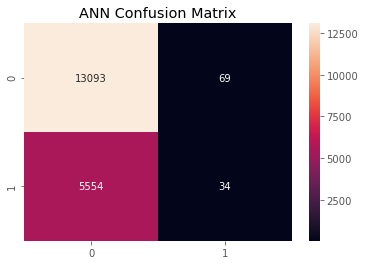

ANN Test Accuracy:  70.01066666666667 %
             precision    recall  f1-score   support

          0       0.70      0.99      0.82     13162
          1       0.33      0.01      0.01      5588

avg / total       0.59      0.70      0.58     18750



In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True,  fmt='')
plt.title('ANN Confusion Matrix')
plt.savefig("ConfusionMatrix.png")
plt.show()
plt.clf()
ann_test_accuracy_score = getAccuracy(y_test, y_pred)
print('ANN Test Accuracy: ', ann_test_accuracy_score, '%')
print(getPrecision(y_test, y_pred))

In [52]:
joblib.dump(classifier, "churn-model.pkl")
joblib.dump(discreet_encoding_values, "discreet_encoding_values.pkl")


['discreet_encoding_values.pkl']

In [183]:
# Evaluating the ANN
'''from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 53, kernel_initializer = 'uniform', activation = 'relu', input_dim = 103))
    #classifier.add(Dense(units = 53, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 1000, epochs = 10)
# cv = We have to do the cross validation 10 times.
# n_jobs will use all the cpu's to build the CV in order to complete the processing fast. But this is not working in my system.
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 1)
mean = accuracies.mean()
variance = accuracies.std()

print('accuracies :: ', accuracies, ' mean :: ', mean, ' variance :: ', variance)'''

"from keras.wrappers.scikit_learn import KerasClassifier\nfrom sklearn.model_selection import cross_val_score\nfrom keras.models import Sequential\nfrom keras.layers import Dense\ndef build_classifier():\n    classifier = Sequential()\n    classifier.add(Dense(units = 53, kernel_initializer = 'uniform', activation = 'relu', input_dim = 103))\n    #classifier.add(Dense(units = 53, kernel_initializer = 'uniform', activation = 'relu'))\n    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))\n    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])\n    return classifier\nclassifier = KerasClassifier(build_fn = build_classifier, batch_size = 1000, epochs = 10)\n# cv = We have to do the cross validation 10 times.\n# n_jobs will use all the cpu's to build the CV in order to complete the processing fast. But this is not working in my system.\naccuracies = cross_val_score(estimator = classifier, X = X_train, y = y_tr

In [184]:
# Tuning the ANN
'''def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 53, kernel_initializer = 'uniform', activation = 'relu', input_dim = 104))
    #classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [1000, 2000],
              'epochs': [10, 20],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
no_of_splits = grid_search.n_splits_

print('grid_search ', grid_search)
print('best_parameters ', best_parameters)
print('best_accuracy ', best_accuracy)
print('cv results ', grid_search.cv_results_)
print('scorer ', grid_search.scorer_)
print('number of splits  ', grid_search.n_splits_)'''


"def build_classifier(optimizer):\n    classifier = Sequential()\n    classifier.add(Dense(units = 53, kernel_initializer = 'uniform', activation = 'relu', input_dim = 104))\n    #classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))\n    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))\n    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])\n    return classifier\nclassifier = KerasClassifier(build_fn = build_classifier)\nparameters = {'batch_size': [1000, 2000],\n              'epochs': [10, 20],\n              'optimizer': ['adam', 'rmsprop']}\ngrid_search = GridSearchCV(estimator = classifier,\n                           param_grid = parameters,\n                           scoring = 'accuracy',\n                           cv = 10)\ngrid_search = grid_search.fit(X_train, y_train)\nbest_parameters = grid_search.best_params_\nbest_accuracy = grid_search.best_score_\nno_